In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [ ]:
Final = pd.read_csv("Data/Final_Data.csv")

In [3]:
print(Final)

      Slope  Elevation                    Corina  Target
0       214       2393                Bare rocks       1
1       211       2387                Bare rocks       1
2       207       2387                Bare rocks       1
3       213       2405                Bare rocks       1
4       210       2406                Bare rocks       1
...     ...        ...                       ...     ...
8979    243       2672  Sparsely vegetated areas       0
8980    250       1846            Inland marshes       0
8981    244       2314  Sparsely vegetated areas       0
8982    229       2323  Sparsely vegetated areas       0
8983    250       1848            Inland marshes       0

[8984 rows x 4 columns]


In [4]:
Info=Final.describe()
print(Info)

             Slope    Elevation       Target
count  8984.000000  8984.000000  8984.000000
mean    224.022484  2274.537066     0.500111
std      21.318906   372.825058     0.500028
min     105.000000  1069.000000     0.000000
25%     210.000000  2029.750000     0.000000
50%     228.000000  2256.000000     1.000000
75%     242.000000  2453.250000     1.000000
max     250.000000  3910.000000     1.000000


In [5]:
print(Final[Final['Target']==1].describe())
print()
print(Final[Final['Target']==0].describe())


             Slope    Elevation  Target
count  4493.000000  4493.000000  4493.0
mean    217.829958  2263.405742     1.0
std      20.823657   261.865821     0.0
min     139.000000  1557.000000     1.0
25%     204.000000  2137.000000     1.0
50%     218.000000  2271.000000     1.0
75%     237.000000  2381.000000     1.0
max     250.000000  2967.000000     1.0

             Slope    Elevation  Target
count  4491.000000  4491.000000  4491.0
mean    230.217769  2285.673347     0.0
std      19.967831   457.425003     0.0
min     105.000000  1069.000000     0.0
25%     219.000000  1887.000000     0.0
50%     235.000000  2206.000000     0.0
75%     247.000000  2572.000000     0.0
max     250.000000  3910.000000     0.0


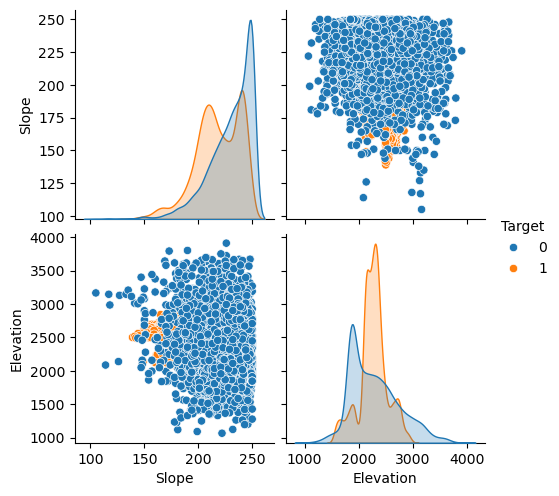

In [6]:
sns.pairplot(data=Final,hue='Target')


In [7]:
Final.dropna(inplace=True)

# Select only numeric columns
numeric_final = Final[Final['Target'] == 1].select_dtypes(include=np.number)

# Calculate and print the correlation matrix
print(numeric_final.corr())

print()

Final.dropna(inplace=True)

# Select only numeric columns for Target == 0
numeric_final_0 = Final[Final['Target'] == 0].select_dtypes(include=np.number)

# Calculate and print the correlation matrix
print(numeric_final_0.corr())


              Slope  Elevation  Target
Slope      1.000000  -0.265804     NaN
Elevation -0.265804   1.000000     NaN
Target          NaN        NaN     NaN

              Slope  Elevation  Target
Slope      1.000000  -0.331391     NaN
Elevation -0.331391   1.000000     NaN
Target          NaN        NaN     NaN


In [8]:
data=Final.drop('Target',axis=1)
target=Final['Target']
data_dummy=pd.get_dummies(data)


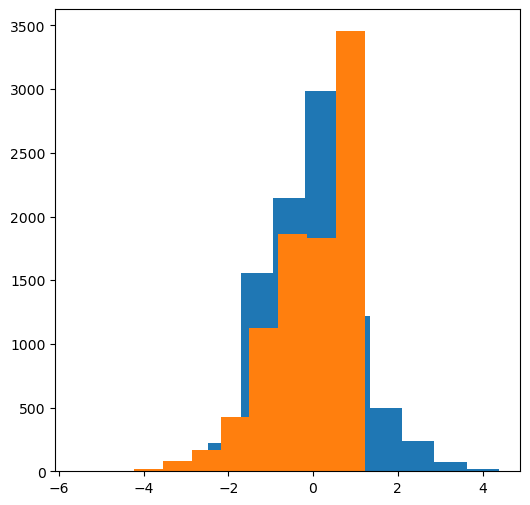

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data_dummy)
scaled_data=scaler.fit_transform(data_dummy)
scaled_data=pd.DataFrame(scaled_data,columns=data_dummy.columns)
fig,ax=plt.subplots(figsize=(6,6))
ax.hist(scaled_data['Elevation'])
ax.hist(scaled_data['Slope'])
scaled_data.to_csv("Normalized_data.csv",index=False)
target.to_csv("Target.csv",index=False)
